<img src="https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png" style="float: left; margin: 15px;">
### DBSCAN-Code-From-Scratch


Week **6** | Lesson **2.2**

---
| TIMING  | TYPE  
|:-:|---|---|
| 25 min| [Review](#review) |
| 10 min| [**Industry Example **](#hook) |
| 45 min| [**Content **](#content) |
| 20 min| [Conclusion](#conclusion) |
| 5 min | [Additional Resources](#more)

---

### Lesson Objectives
*After this lesson, you will be able to:*
- Demonstrate an understanding of how DBSCAN works by coding the algorithm from stratch

---
### Student Pre-Work 

*Before this lesson, you should already be able to:*
- Understand how K-Means clustering works
- Use Matplotlib and Seaborn for ploting data
- Go through this data visualization of [DBSCAN](https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/)

---
<a name="review"></a>
### Review: 
If you didn't already do so, go through this data visualization of [DBSCAN](https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/)


---
<a name="hook"> </a>

### Applications: 

[DBSCAN](https://www.oreilly.com/ideas/clustering-geolocated-data-using-spark-and-dbscan) is used to proximity cluster app users based on their spatial coordinates

![](https://d3ansictanv2wj.cloudfront.net/florida.dbscan2-8797930765675ecb45d7c19406db8031.jpg)



---
# **Lesson**
<a name="content"></a>

## Density-based spatial clustering of applications with noise (DBSCAN)

---

DBSCAN is a clustering algorithm that groups datapoints together based on "density". Nearby points get assigned to a common cluster, and outlier points get assigned to their own clusters. DBSCAN is effective and attractive for its simplicity and minimal pre-specified parameters.

There are only two parameters that need to be specified for DBSCAN:

    eps : a minimum distance between points that can define a "connection"
    
    min_samples : minimum number of points that a point needs to have 
                  as neighbors to define it as a "core sample"
    
**Core samples** are by design the points that lie internally within a cluster. 

**Non-core samples** do not meet the minimum required neighboring points, but are still connected to a cluster defined by a core sample or samples. Hence these points lie on the edges of a cluster.

**Outliers** are points that do not meet the distance criteria to a cluster nor minimum neighbors to form a new cluster.


---

## DBSCAN algorithm

The DBSCAN algorithm proceeds iteratively through the points, determining via the distance measure and minimum samples specified whether points are core samples, edge samples, or outliers.

Here is the pseudocode algorithm below, which we will be coding up ourselves:


```
DBSCAN(D, eps, MinPts) {
   C = 0
   for each point P in dataset D {
      if P is visited
         continue next point
      mark P as visited
      NeighborPts = regionQuery(P, eps)
      if sizeof(NeighborPts) < MinPts
         mark P as NOISE
      else {
         C = next cluster
         expandCluster(P, NeighborPts, C, eps, MinPts)
      }
   }
}

expandCluster(P, NeighborPts, C, eps, MinPts) {
   add P to cluster C
   for each point P' in NeighborPts { 
      if P' is not visited {
         mark P' as visited
         NeighborPts' = regionQuery(P', eps)
         if sizeof(NeighborPts') >= MinPts
            NeighborPts = NeighborPts joined with NeighborPts'
      }
      if P' is not yet member of any cluster
         add P' to cluster C
   }
}

regionQuery(P, eps)
   return all points within P's eps-neighborhood (including P)
```

---

## DBSCAN in parts

We can roll our own DBSCAN following the pseudcode above. Doing it piece by piece in parts will make it clear how the algorithm works.

### 1. Create some clustered data

sklearn has some nice data generation functions in its `sklearn.datasets` module. I've loaded a handful of them below. You can use them to create clustered data easily to test clustering algorithms.

Generate clustered data and plot it out.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use('fivethirtyeight')

from ipywidgets import *
from IPython.display import display

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
# Dataset generators:
from sklearn.datasets import make_biclusters, make_blobs, make_circles, make_moons

In [3]:
X, bloby = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=1.5)

In [14]:
bloby

array([3, 1, 1, 1, 0, 0, 2, 3, 1, 0, 2, 3, 3, 0, 2, 0, 3, 1, 2, 3, 3, 1, 1,
       1, 0, 3, 0, 2, 3, 1, 1, 0, 3, 2, 0, 3, 2, 1, 0, 2, 1, 2, 0, 1, 2, 0,
       3, 0, 3, 1, 3, 3, 0, 3, 0, 3, 0, 1, 1, 2, 3, 3, 2, 3, 1, 1, 2, 3, 0,
       1, 0, 1, 0, 0, 3, 3, 0, 0, 0, 0, 1, 3, 2, 1, 0, 0, 2, 2, 2, 1, 3, 1,
       2, 2, 2, 3, 0, 1, 3, 3, 0, 2, 2, 0, 0, 3, 1, 0, 1, 0, 2, 1, 3, 2, 3,
       2, 2, 0, 2, 3, 1, 0, 2, 1, 0, 1, 1, 3, 1, 3, 3, 1, 0, 2, 3, 1, 1, 2,
       2, 2, 2, 2, 2, 3, 0, 1, 0, 2, 2, 3, 1, 1, 1, 1, 3, 2, 2, 2, 0, 3, 1,
       0, 0, 2, 2, 1, 1, 1, 1, 3, 0, 3, 0, 2, 2, 0, 0, 3, 1, 2, 1, 2, 2, 2,
       3, 0, 3, 0, 3, 1, 0, 0, 2, 2, 3, 3, 3, 3, 0, 1])

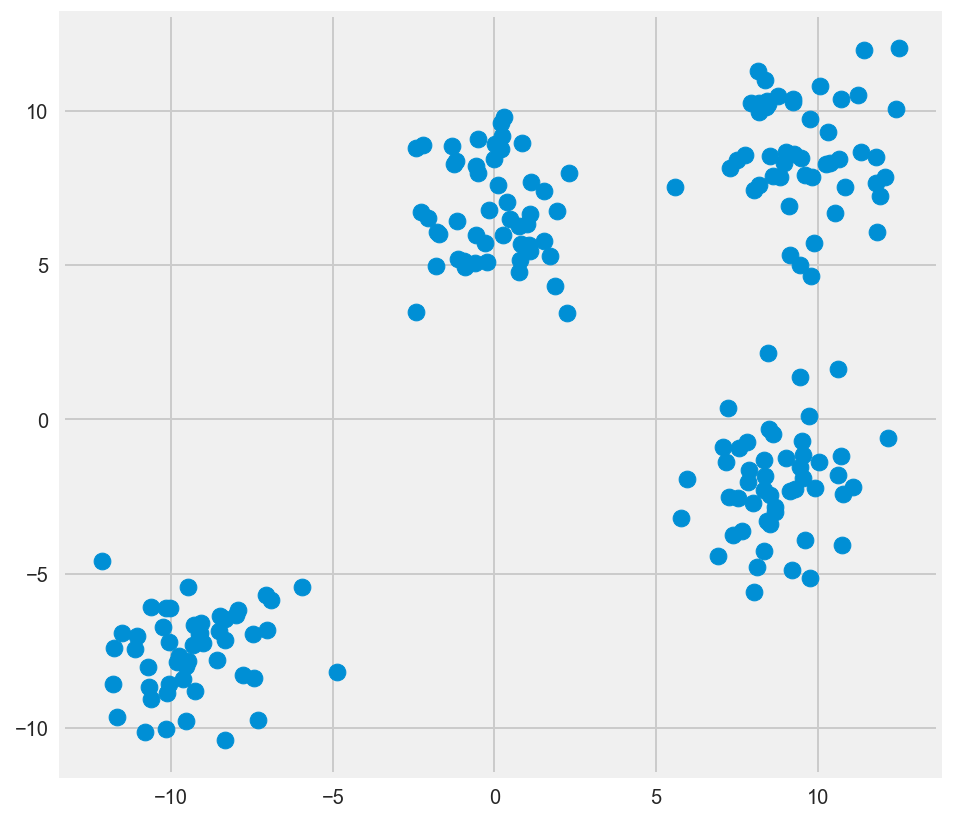

In [4]:
def plot_clusters(X):
    
    fig, ax = plt.subplots(figsize=(7,7))
    
    ax.scatter(X[:,0], X[:,1], s=70)
    
    plt.show()
    
plot_clusters(X)

---

### 2. Make the skeleton of the DBSCAN class

Start laying out the blueprint for how DBSCAN will work. We'll need to start out:

1. An `__init__` function to initialize the class with the `eps` and `min_samples` arguments.
- A (for now empty) `fit` function that will run DBSCAN on the data.

In [5]:
class DBSCANKK(object):
    
    def __init__(self, eps=0.5, min_samples=5):
        self.eps = eps
        self.min_samples = min_samples

        
    def fit(self, data):
        pass

---

### 3. Writing the `fit` function (equivalent to the `DBSCAN` function in pseudocode)

Our `fit` function will follow the logic of the `DBSCAN` function in the pseudocode above (re-pasted here). In general, when building classes, think about what variables are best suited to be class attributes. It takes practice to get a feel for it.

```
DBSCAN(D, eps, MinPts) {
   C = 0
   for each point P in dataset D {
      if P is visited
         continue next point
      mark P as visited
      NeighborPts = regionQuery(P, eps)
      if sizeof(NeighborPts) < MinPts
         mark P as NOISE
      else {
         C = next cluster
         expandCluster(P, NeighborPts, C, eps, MinPts)
      }
   }
}
```

In [6]:
# We can use sklearn's sklearn.metrics.pairwise.euclidean_distances 
# to find the distances between points for us, rather than re-coding
# this ourselves.
from sklearn.metrics.pairwise import euclidean_distances

class DBSCANKK(object):
    
    def __init__(self, eps=0.5, min_samples=5):
        self.eps = eps
        self.min_samples = min_samples

        self.point_cluster_labels = None
        self.visited_points = None
        self.distances = None
        self.current_cluster = None
        
        
    def fit(self, data):
        
        # 1. Set up empty numpy arrays that will hold the cluster
        # labels and a binary encoding of which points have been
        # visited.
        self.point_cluster_labels = np.zeros(data.shape[0])
        self.visited_points = np.zeros(data.shape[0])
        
        # 2. Since DBSCAN uses distances between points for its internal
        # workings, we can calculate the distances right off the bat
        # and store it in a class attribute.
        self.distances = euclidean_distances(data)
        
        # 3. Keep the current cluster stored as a class attribute as well.
        # This way other class definitions can directly access and modify
        # it without us needing to pass it in and out of function calls.
        self.current_cluster = 0
        
        # 4. Iterate through the number of rows. i will be the point number
        # that we are currently looking at.
        for i in range(data.shape[0]):
            
            # 5. If we have already visited this point by the time it was
            # reached in the for-loop, just move on to the next one (if a
            # point has been visited, it has been labeled by the algorithm
            # already).
            if self.visited_points[i] == 1:
                continue
                
            # 6. Get the neighbors with our as-of-yet unwritten function
            # "self.find_region_points(i)"
            neighbors = self.find_region_points(i)

            # 7. If there are not enough neighbors for the point, make
            # it an outlier (class code = -1)
            if len(neighbors) < self.min_samples:
                self.point_cluster_labels[i] = -1
                
            # 8. If there ARE enough neighbors, increment the current
            # cluster and call the as-of-yet unwritten function 
            # "self.expand_cluster(i, neighbors)" which will do the
            # cluster logic.
            else:
                self.current_cluster += 1
                self.expand_cluster(i, neighbors)

---

### 4. Write the function to find neighbors

We need to convert this function in the pseudocode to a class function:

```
regionQuery(P, eps)
   return all points within P's eps-neighborhood (including P)
```

I've already named this `self.find_region_points(i)` so far, so we'll call it that.

In [7]:
class DBSCANKK(object):
    
    def __init__(self, eps=0.5, min_samples=5):
        self.eps = eps
        self.min_samples = min_samples

        self.point_cluster_labels = None
        self.visited_points = None
        self.distances = None
        self.current_cluster = None
        
    # 1. Define the find_region_points function we have in the fit function below.
    # It takes the point number as an argument.
    # Because we've stored the distances as a class attribute, all we need is the 
    # current point number (row), since we can just use that to look it up.
    def find_region_points(self, i):
        # 2. Get out the distances from point i to all other points from self.distances
        distvec = self.distances[i]
        
        # 3. Return any point id that is <= the minimum distance (and not the current point)
        return [n for n, dist in enumerate(distvec) if (dist <= self.eps) and (n != i)]
     
        
    def fit(self, data):
        
        self.point_cluster_labels = np.zeros(data.shape[0])
        self.visited_points = np.zeros(data.shape[0])
        
        self.distances = euclidean_distances(data)
        
        self.current_cluster = 0
        
        for i in range(data.shape[0]):
            if self.visited_points[i] == 1:
                continue
                
            neighbors = self.find_region_points(i)

            if len(neighbors) < self.min_samples:
                self.point_cluster_labels[i] = -1
            else:
                self.current_cluster += 1
                self.expand_cluster(i, neighbors)
    

---

### 5. Write the function to expand the clusters.

The final function (and the one that actually assigns our clusters) is defined by the pseudocode as:

```
expandCluster(P, NeighborPts, C, eps, MinPts) {
   add P to cluster C
   for each point P' in NeighborPts { 
      if P' is not visited {
         mark P' as visited
         NeighborPts' = regionQuery(P', eps)
         if sizeof(NeighborPts') >= MinPts
            NeighborPts = NeighborPts joined with NeighborPts'
      }
      if P' is not yet member of any cluster
         add P' to cluster C
   }
}
```

Essentially the function takes a point id, the neighboring point ids, the cluster number, minimum distance, and minimum points, and figures out based on those components what cluster a point should be in. 

I've already pre-named this function in the `fit` function to be `expand_cluster(i, neighbors)`. We only need to pass in the current point and neighboring points because we're storing all of the other information the function needs as class attributes.

In [8]:
class DBSCANKK(object):
    
    def __init__(self, eps=0.5, min_samples=5):
        self.eps = eps
        self.min_samples = min_samples

        self.point_cluster_labels = None
        self.visited_points = None
        self.distances = None
        self.current_cluster = None
        
    
    def find_region_points(self, i):
        distvec = self.distances[i]
        return [n for n, dist in enumerate(distvec) if (dist <= self.eps) and (n != i)]
    
    
    # 1. Write up the final expand_cluster function, taking the current point id and
    # its neighboring point ids.
    def expand_cluster(self, i, neighbors):
        
        # 2. When this function is called, we have determined that we are
        # going to make the current point i part of the current cluster, 
        # as defined by self.current_cluster. Our first order of business
        # is to set its cluster label in self.point_cluster_labels to be
        # equal to the current cluster.
        self.point_cluster_labels[i] = self.current_cluster
        
        # 3. We also want to determine which of its neighbors should also be
        # part of the cluster. This is contingent on the neighbor not belonging
        # to a cluster yet.
        # While we're at it, we will also look at the neighbor's neighbors and
        # see if THEY should be part of the cluster too. 
        # To do all of this, we set up a while-loop that says:
        # - while there are still points in the neighbors list:
        #   - pop a neighbor from the list
        #   - if the neighbor has not been visited:
        #      - find that neighbor's neighbors and add them to the list of neighbors
        #   - if the neighbor has not been assigned a cluster, give it the current one
        while len(neighbors) > 0:
            
            # pop the last neighbor off the list
            n = neighbors.pop()
            
            # check if this neighbor has been visited. If not...
            if self.visited_points[n] == 0:
                
                # ...make the neighbor visited
                self.visited_points[n] = 1
                
                # ...find this neighbor's own neighbors (that meet criteria
                # in eps and min_samples)
                neighbor_neighbors = self.find_region_points(n)
                
                if len(neighbor_neighbors) >= self.min_samples:
                    # ...and extend our list of neighbors to put in this cluster
                    neighbors.extend(neighbor_neighbors)
                    
            # As long as this point has not been assigned a cluster already,
            # assign it the current cluster.
            if self.point_cluster_labels[n] == 0:
                self.point_cluster_labels[n] = self.current_cluster   
        
        
    def fit(self, data):
        
        self.point_cluster_labels = np.zeros(data.shape[0])
        self.visited_points = np.zeros(data.shape[0])
        
        self.distances = euclidean_distances(data)
        
        self.current_cluster = 0
        
        for i in range(data.shape[0]):
            if self.visited_points[i] == 1:
                continue
                
            neighbors = self.find_region_points(i)

            if len(neighbors) < self.min_samples:
                self.point_cluster_labels[i] = -1
            else:
                self.current_cluster += 1
                self.expand_cluster(i, neighbors)

---

## Full "`DBSCANKK`" code without comments

Without the comments it is actually pretty concise. Again, DBSCAN is a powerful clustering algorithm but also appealing for its simplicity and the intuitive way it finds points.

In [9]:
from sklearn.metrics.pairwise import euclidean_distances

class DBSCANKK(object):
    
    def __init__(self, eps=0.5, min_samples=5):
        self.eps = eps
        self.min_samples = min_samples

        self.point_cluster_labels = None
        self.visited_points = None
        self.distances = None
        self.current_cluster = None
        
    
    def find_region_points(self, i):
        distvec = self.distances[i]
        return [n for n, dist in enumerate(distvec) if (dist <= self.eps) and (n != i)]
    
    
    def expand_cluster(self, i, neighbors):
        
        self.point_cluster_labels[i] = self.current_cluster
        
        while len(neighbors) > 0:
            n = neighbors.pop()
            
            if self.visited_points[n] == 0:
                self.visited_points[n] = 1
                
                neighbor_neighbors = self.find_region_points(n)
                if len(neighbor_neighbors) >= self.min_samples:
                    neighbors.extend(neighbor_neighbors)
                    
            if self.point_cluster_labels[n] == 0:
                self.point_cluster_labels[n] = self.current_cluster   
        
        
    def fit(self, data):
        
        self.point_cluster_labels = np.zeros(data.shape[0])
        self.visited_points = np.zeros(data.shape[0])
        
        self.distances = euclidean_distances(data)
        
        self.current_cluster = 0
        
        for i in range(data.shape[0]):
            if self.visited_points[i] == 1:
                continue
                
            neighbors = self.find_region_points(i)

            if len(neighbors) < self.min_samples:
                self.point_cluster_labels[i] = -1
            else:
                self.current_cluster += 1
                self.expand_cluster(i, neighbors)
    

---

## Plotting DBSCAN interactively

We can look at how the `eps` and `min_samples` parameters affect DBSCAN's decisions about assigning clusters. This is also a good opportunity to go over how to make interactive visualizations with ipython widgets.

### 1. Re-write the plotting function to accept cluster labels and color the points accordingly

In [10]:
def plot_clusters(X, labels):
    
    fig, ax = plt.subplots(figsize=(8,7))
        
    # stole some of this from sklearn's dbscan plot:
    unique_labels = set(labels)
    colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
    
    for k, c in zip(unique_labels, colors):
        if k == -1:
            c = 'grey'

        class_member_mask = (labels == k)

        xy = X[class_member_mask]
        ax.scatter(xy[:, 0], xy[:, 1], color=c, s=70, label='class '+str(k))
    
    ax.legend(loc='lower right')
    plt.show()

---

### 2. Write a function that accepts `eps` and `min_samples` as keyword arguments, fits DBSCAN, and calls the plotting function

Don't pass `X` in to the function. We will just use the "global" X defined in the jupyter notebook earlier.

In [11]:
def cluster_plotter(eps=1.0, min_samples=5):
    
    dbkk = DBSCANKK(eps=eps, min_samples=min_samples)
    dbkk.fit(X)

    plot_clusters(X, dbkk.point_cluster_labels)

---

### 3. Make the "interact" function that creates the ipython widget

Your interact function defines the sliders (or other inputs you want to be interactive) and then makes a call to `widgets.interact(function, *interactive objects)` where:

- "function" is the function that takes the values coming out of the interactive slider objects (we wrote it just before: it takes `eps` and `min_samples`
- The interactive objects in our case will be a `widgets.FloatSlider` for eps and a `widgets.IntSlider` for the min_samples.

For more information see this handy notebook:

https://github.com/ipython/ipywidgets/blob/master/docs/source/examples/Index.ipynb

In [12]:
def cluster_interact():
    eps = widgets.FloatSlider(min=0.0, max=5.0, step=0.01,
                              continuous_update=False, value=1.0)
    eps.width = '600px'
    eps.description = 'eps:'
    
    mins = widgets.IntSlider(min=1, max=50, step=1,
                             continuous_update=False, value=5)
    mins.width = '600px'
    mins.description = 'min samps:'

    widgets.interact(cluster_plotter,
                     eps=eps, min_samples=mins)

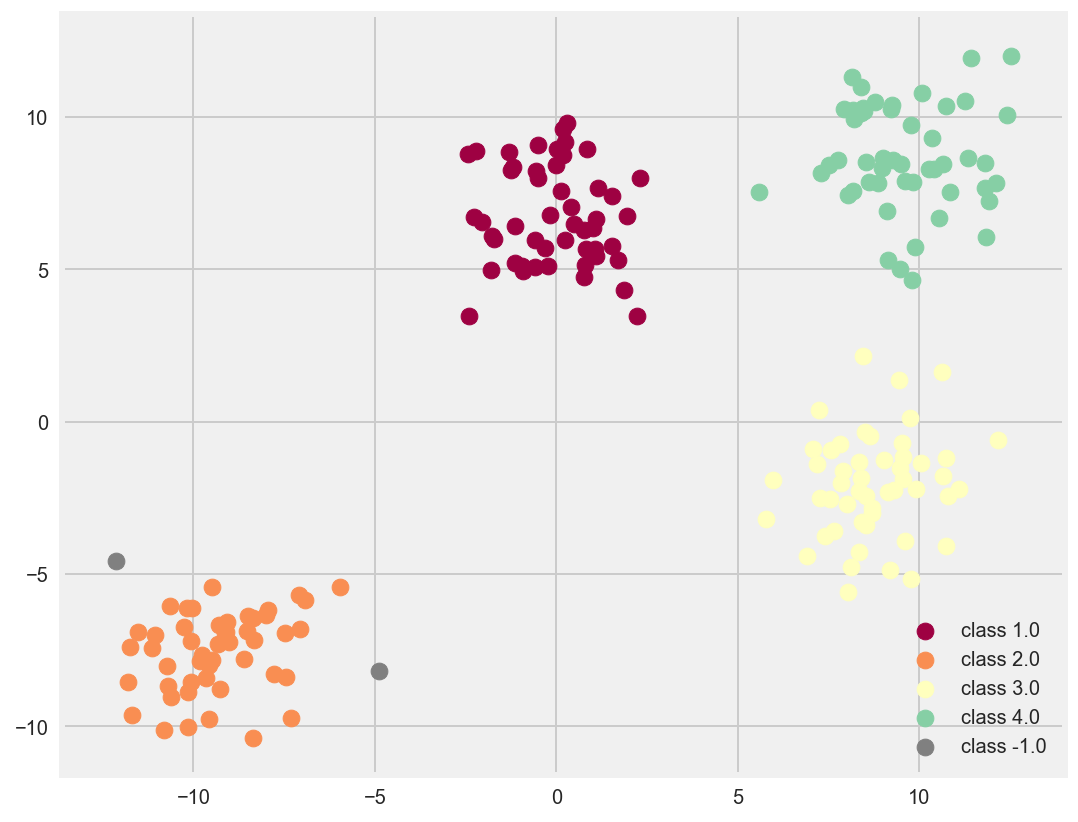

In [13]:
cluster_interact()

---
### **Conclusion**
<a name="conclusion"></a>

In this lesson we learned how DBSCAN works by coding the algorithm from scratch and applying it to a data set. 

---
<a name="more"></a>
### Additional Resources

Check out Sklearn's implementaion of [DBSCAN](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html)

#### Hierarchical version of DBSCAN

![](https://pbs.twimg.com/media/CiIwiz6WEAAWsto.jpg)
Check out a Hierarchical version of DBSCAN called [HDBSCAN](http://hdbscan.readthedocs.io/en/latest/how_hdbscan_works.html). This package has a fast implementation that performs faster than other Python clustering methods. This [Jupyter Notebook](http://nbviewer.jupyter.org/github/scikit-learn-contrib/hdbscan/blob/master/notebooks/How%20HDBSCAN%20Works.ipynb) explains in lucid detail just how HDBSCAN works. 